## Install and Import Dependencies

In [38]:
!pip install torch torchvision torchaudio
!pip install easyocr

In [39]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

## Read in images or videos

In [40]:
img_path = '/kaggle/input/ocrimage/testocr.png'

In [41]:
reader = easyocr.Reader(['en'],gpu = False)
result = reader.readtext(img_path)
result

[([[33, 84], [587, 84], [587, 127], [33, 127]],
  'This is a lot of 12 point text to test the',
  0.7515471434680752),
 ([[31, 121], [485, 121], [485, 157], [31, 157]],
  'ocr code and see if it works on',
  0.9301597466870826),
 ([[495, 123], [625, 123], [625, 163], [495, 163]],
  'all types',
  0.9978408899985456),
 ([[31, 154], [227, 154], [227, 191], [31, 191]],
  'of file format:',
  0.7233347825715364),
 ([[32, 184], [592, 184], [592, 233], [32, 233]],
  'The quick brown dog jumped over the',
  0.8490544513978411),
 ([[29, 220], [591, 220], [591, 265], [29, 265]],
  'lazy fox The quick brown dog jumped',
  0.8124401810508688),
 ([[31, 255], [605, 255], [605, 299], [31, 299]],
  'over the lazy fox. The quick brown dog',
  0.8062024754377798),
 ([[39, 287], [568, 287], [568, 332], [39, 332]],
  'jumped over the lazy fox. The quick',
  0.5960078667872891),
 ([[32, 321], [568, 321], [568, 369], [32, 369]],
  'brown dog jumped over the lazy fox.',
  0.7642401091508723)]

## Draw Results

In [42]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

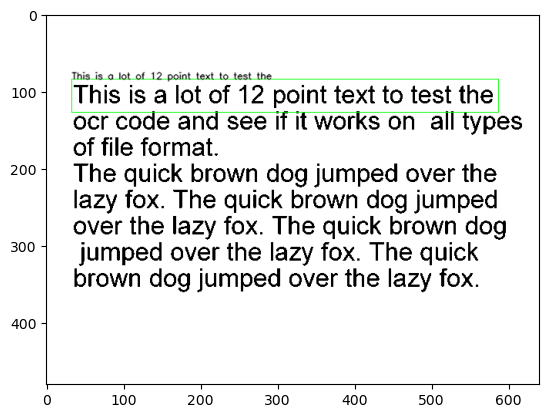

In [43]:
img = cv2.imread(img_path)
img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 1)
img = cv2.putText(img, text, top_left, font, .4, (0,0,0),1, cv2.LINE_AA)
plt.imshow(img)
plt.show()

## Handling Multiple Lines

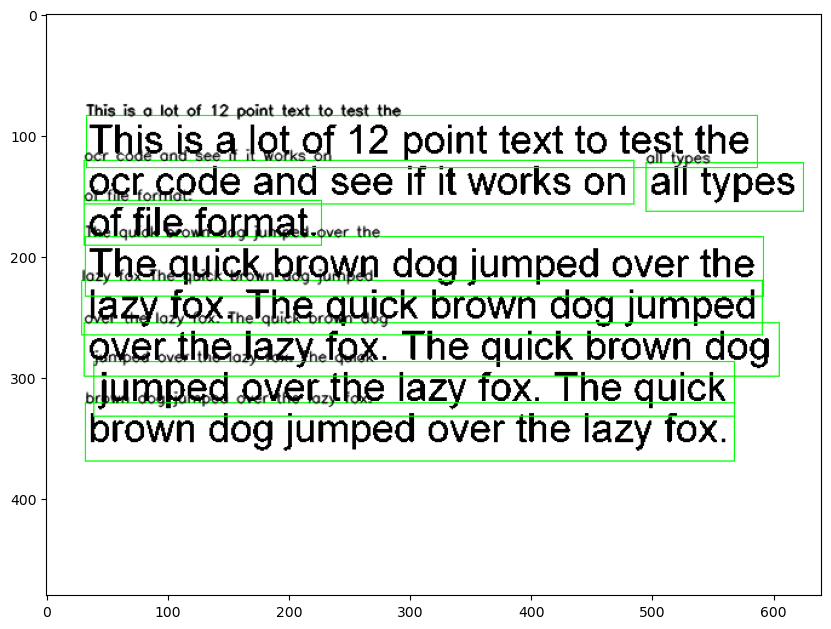

In [44]:
for det in result:
    top_left = tuple([int(val) for val in det[0][0]])
    bottom_right = tuple([int(val) for val in det[0][2]])
    text = det[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 1)
    img = cv2.putText(img, text, top_left, font, .4, (0,0,0),1, cv2.LINE_AA)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()
    